In [1]:
# to generate plots that shows fitting with ANN
# is clearly a function of the quantity of training data
# and the number of epochs

# data for fitting by the ANN is generated using a configurable multivariate
# linear model

# the code can also be changed easily to look at two alternative model
# architectures, and of course, the number of neurons in the dense layer can
# be modulated

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from math import ceil, floor

# Number of samples
num_samples = 400

# Generate predictable random values for features
np.random.seed(0)
feature1 = np.random.rand(num_samples)
feature2 = np.random.rand(num_samples)
feature3 = np.random.rand(num_samples)

# Calculate y using the multivariate linear model
# some constants for data generation
c0 = 10
c1 = 1.2
c2 = 2.4
c3 = -3.9
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

# the equation the get the label aka y
label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * feature3)
# a text label from data generation
model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " X3".translate(SUB)

# non-linear regression example
#label = c0 + (c1 * feature1) + (c2 * feature2) + (c3 * ((1/feature3)**2))
#model_as_text = "y = " + str(c0) + " + " + str(c1) + " X1 + ".translate(SUB) + str(c2) + " X2 + ".translate(SUB) + str(c3) + " (1 / X3)".translate(SUB) + " ** 2"

# Create a DataFrame to hold the data
data = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'feature3': feature3,
    'label': label
})
#print(data)

# Column to sort by, the label index
column_index = 3
print("\nSorted\n")
# Sort the array based on the specified column
data = data.sort_values(by='label')
# have a look at the generated data
print(data)


Sorted

     feature1  feature2  feature3      label
322  0.055374  0.028953  0.962395   6.382595
357  0.128861  0.001383  0.826805   6.933412
180  0.164694  0.160230  0.921719   6.987482
43   0.060225  0.046007  0.817339   6.995066
172  0.199997  0.174772  0.939161   6.996721
..        ...       ...       ...        ...
103  0.962189  0.750595  0.059383  12.724460
365  0.458604  0.945027  0.018096  12.747813
364  0.882041  0.880678  0.103578  12.768121
162  0.722056  0.980580  0.111496  12.785024
21   0.799159  0.990345  0.000546  13.333689

[400 rows x 4 columns]


In [3]:
# pull the data frame apart
X = data[['feature1', 'feature2', 'feature3']].values
y = data['label'].values

# print some data points from X and y
# remember syntax of slicing is different to perl
print_n = 5
print("Showing " + str(print_n) + " data points")
print("X:\n")
print(X[:print_n])
print("")
print("X.shape[1] = " + str(X.shape[1]))
print("")
print("y:\n")
print(y[:print_n])

Showing 5 data points
X:

[[0.05537432 0.02895255 0.96239507]
 [0.12886057 0.00138335 0.82680527]
 [0.16469416 0.16023047 0.92171907]
 [0.06022547 0.04600731 0.81733911]
 [0.19999652 0.174772   0.93916091]]

X.shape[1] = 3

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]


Set epochs_tup to  (1, 25, 50, 100, 200, 800)
epochs 1



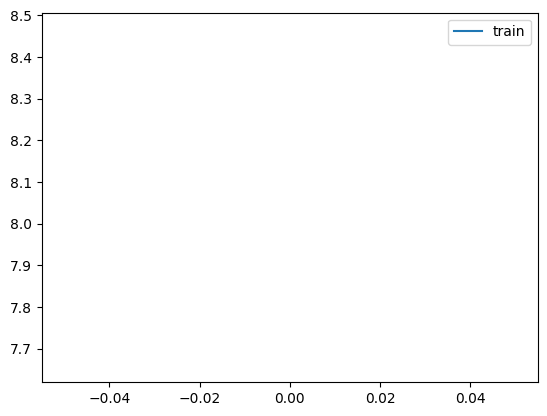

Training loss begin: 8.063040733337402
Training loss   end: 8.063040733337402

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[1.6352359 1.5061377 1.8265634 1.4328638 1.9128209]
-----------------------------------------------------------
epochs 25



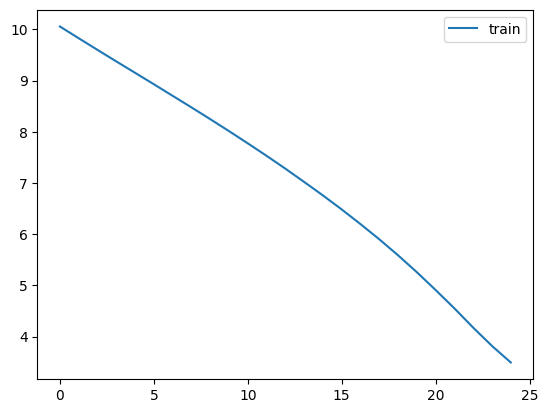

Training loss begin: 10.057822227478027
Training loss   end: 3.4952211380004883

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[6.2060223 5.948668  6.6975994 5.7107444 6.92199  ]
-----------------------------------------------------------
epochs 50



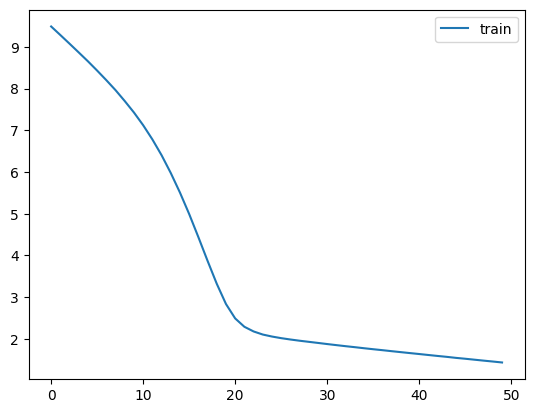

Training loss begin: 9.491905212402344
Training loss   end: 1.431420087814331

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[6.0255723 6.0351033 6.7208    5.8625536 6.9340014]
-----------------------------------------------------------
epochs 100



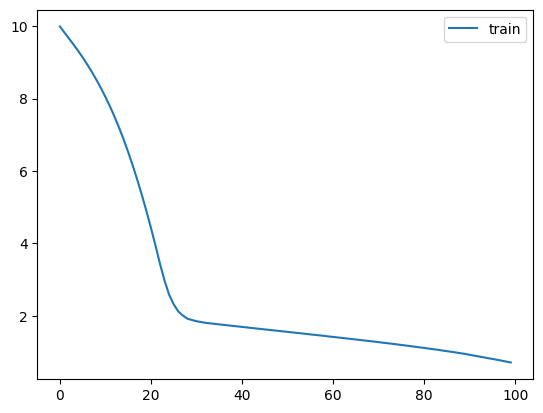

Training loss begin: 9.989448547363281
Training loss   end: 0.7126169800758362

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[5.7792406 5.888469  6.4078526 5.815735  6.550379 ]
-----------------------------------------------------------
epochs 200



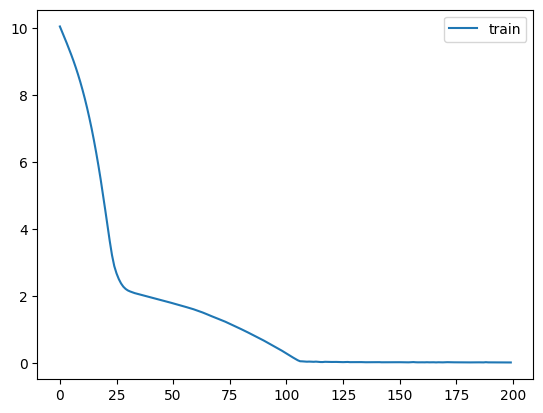

Training loss begin: 10.054544448852539
Training loss   end: 0.014287489466369152

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[6.428915  6.93395   6.9876866 6.98949   6.996659 ]
-----------------------------------------------------------
epochs 800



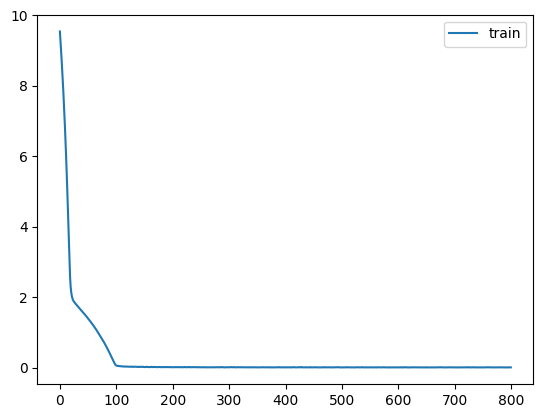

Training loss begin: 9.538447380065918
Training loss   end: 0.0054677450098097324

y:

[6.38259451 6.93341216 6.98748175 6.99506558 6.99672109]

predictions:

[6.4681234 6.9207053 6.9808855 6.9460244 6.987836 ]
-----------------------------------------------------------


In [4]:
# Create a list to store the plot data (axes)
series = []
titles = []

# Define the number of plots in the grid
# Number of rows and columns for the grid
epochs_tup = ()
if (False):
  epochs_tup = (1, 5, 50, 100)
  n_rows = 2
  n_cols = 2
elif (False):
  epochs_tup = (1, 3, 5, 25, 50, 100, 200, 400, 800)
  n_rows = 3
  n_cols = 3
else:
  epochs_tup = (1, 25, 50, 100, 200, 800)
  n_rows = 2
  n_cols = 3

print("Set epochs_tup to ", epochs_tup)

num_plots = n_cols * n_rows

#print("type ", type(epochs_tup))
#print("length ", len(epochs_tup))

for epochs in (epochs_tup):

  print("epochs " + str(epochs))
  print("")
  # model_type = "2 Layer ANN"
  model_type = "3 Layer ANN"
  # model_type = "4 Layer ANN"
  # model_type = "5 Layer ANN"

  if (model_type == "2 Layer ANN"):
    model_desc = "2 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    # Create and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X.shape[1],))
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
  elif (model_type == "3 Layer ANN"):
    model_desc = "3 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(20, input_dim=X.shape[1], kernel_initializer='he_uniform', activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mae', optimizer='adam')
  elif (model_type == "5 Layer ANN"):
    # incomplete, attempt at non-linear regression
    model_desc = "5 layer ANN, samples(" + str(num_samples) + "), epochs(" + str(epochs) + ")"
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation="relu", input_dim=X.shape[1]))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(8, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="linear"))
    #model.compile(loss='mae', optimizer='adam')
    # Create the Adam optimizer with custom parameters
    adam_optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.001 /200,
      amsgrad=False
    )

    model.compile(loss='mae', optimizer=adam_optimizer)



  # Train the model
  history = model.fit(X, y, epochs=epochs, verbose=0)

  # Plot training history
  plt.plot(history.history['loss'], label='train')
  plt.legend()
  plt.show()

  print("Training loss begin:", history.history['loss'][0])
  print("Training loss   end:", history.history['loss'][-1])
  print("")

  # Make predictions
  pred = model.predict(X, verbose = 0)

  # lets see some actual values and predictions
  print("y:\n")
  # y is also (data['label'].values)
  p_n = 5
  print(y[:p_n])
  print("")
  print("predictions:\n")
  predictions = pred[:,0]
  print(predictions[:p_n])


  max_value = ceil(max(max(y),max(predictions)))
  min_value = floor(min(min(y),min(predictions)))
  #print("Max ", max_value)
  #print("Min ", min_value)
  ilist = list(range(min_value, max_value + 1))
  #print(ilist)

  # Define the series to be added to each plot
  one_plot_data = [(y, predictions, 'Data points'), (ilist, ilist, 'Identity')]
  series.append(one_plot_data)
  titles.append(model_desc)

  print("-----------------------------------------------------------")

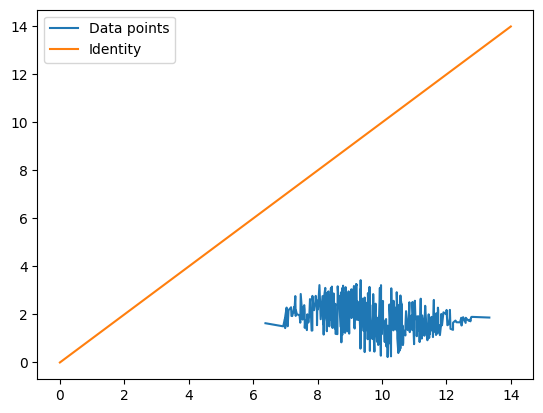

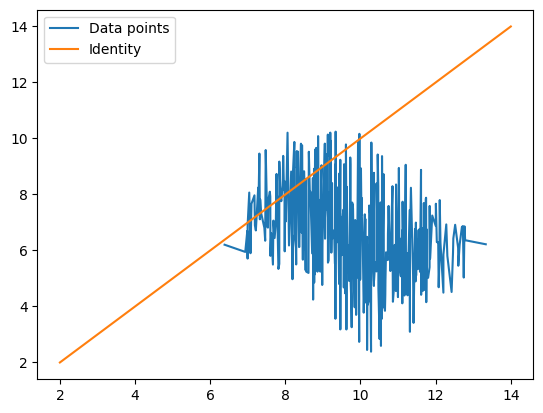

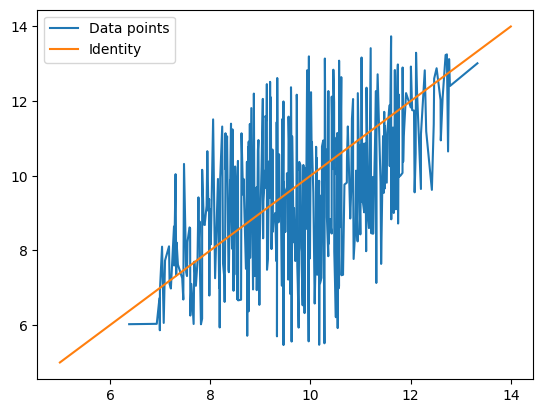

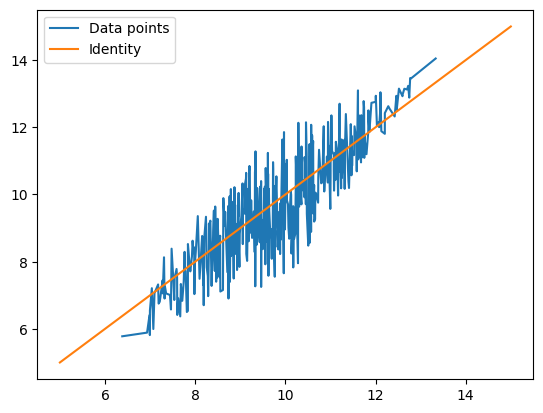

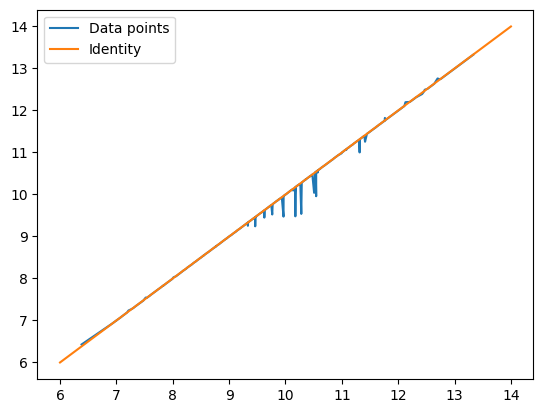

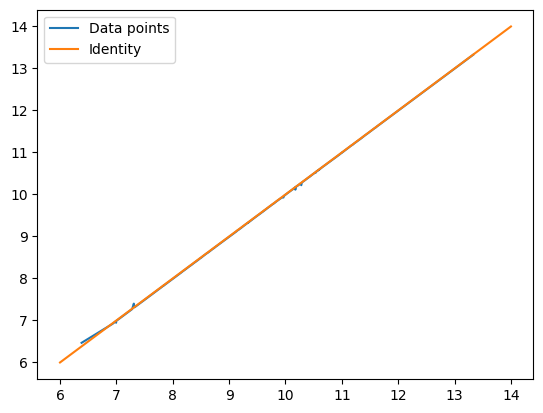

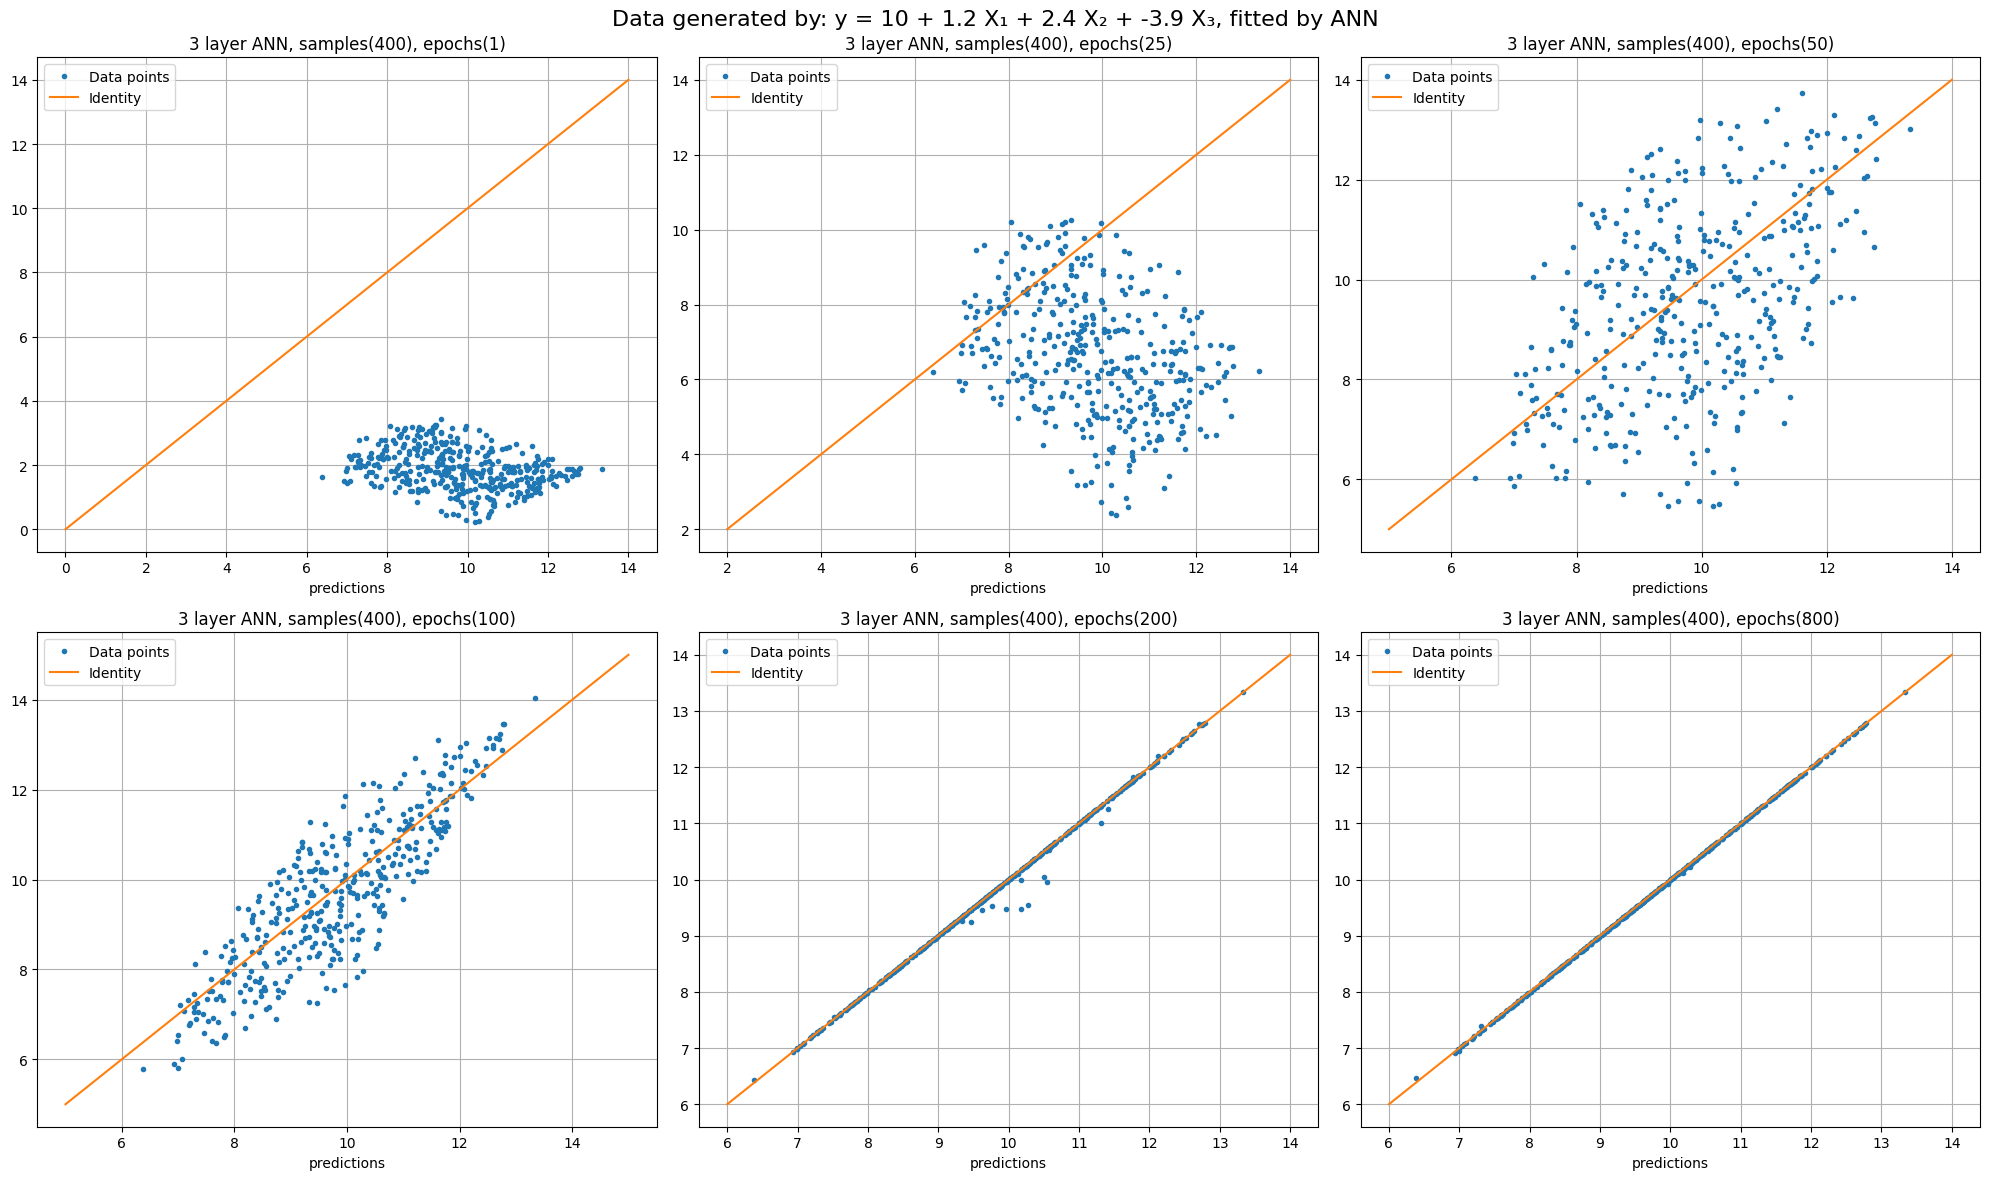

In [5]:
# Create a list to store the plot data (figure and axes)
plot_data = []

# Create plots in a loop
for series_set in series:
    fig, ax = plt.subplots()
    for x_data, y_data, label in series_set:
        ax.plot(x_data, y_data, label=label)
    ax.legend()
    plot_data.append((fig, ax))


# Create a new figure for the grid layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

fig.suptitle('Data generated by: ' + model_as_text + ', fitted by ANN', fontsize=16)

# Flatten the axs array if necessary (in case of a single row or column)
if n_rows == 1 and n_cols == 1:
    axs = np.array([[axs]])

axs = axs.flatten()

# Loop over the plot_data array and plot in the grid
for i, (fig, ax) in enumerate(plot_data):
    for line in ax.get_lines():
        if (line.get_label() == 'Identity'):
          style = '-'
        else:
          style = '.'
        axs[i].plot(line.get_xdata(), line.get_ydata(), style, label=line.get_label())
    axs[i].legend()
    axs[i].set_xlabel('y')
    axs[i].set_xlabel('predictions')
    axs[i].set_title(titles[i])
    axs[i].grid(True)


# Adjust layout
plt.tight_layout()

# Display the grid of plots
#plt.show()
fig.show()

The model architecture


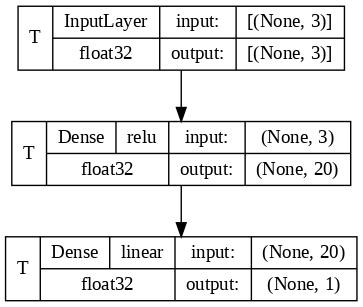

In [6]:
# Generate a plot of the model architecture
print("The model architecture")
plot_model(model,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           show_dtype=True,
           expand_nested=True,
           dpi=100,
           show_layer_activations=True,
           show_trainable=True)
